In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
#https://www.inegi.org.mx/programas/enigh/nc/2018/default.html#Microdatos
path = 'Pokemon.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.shape

(800, 13)

In [6]:
df.shape[0]

800

In [7]:
df.shape[1]

13

In [8]:
df.columns.values.tolist()

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [9]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [10]:
df.isnull().any().any()

True

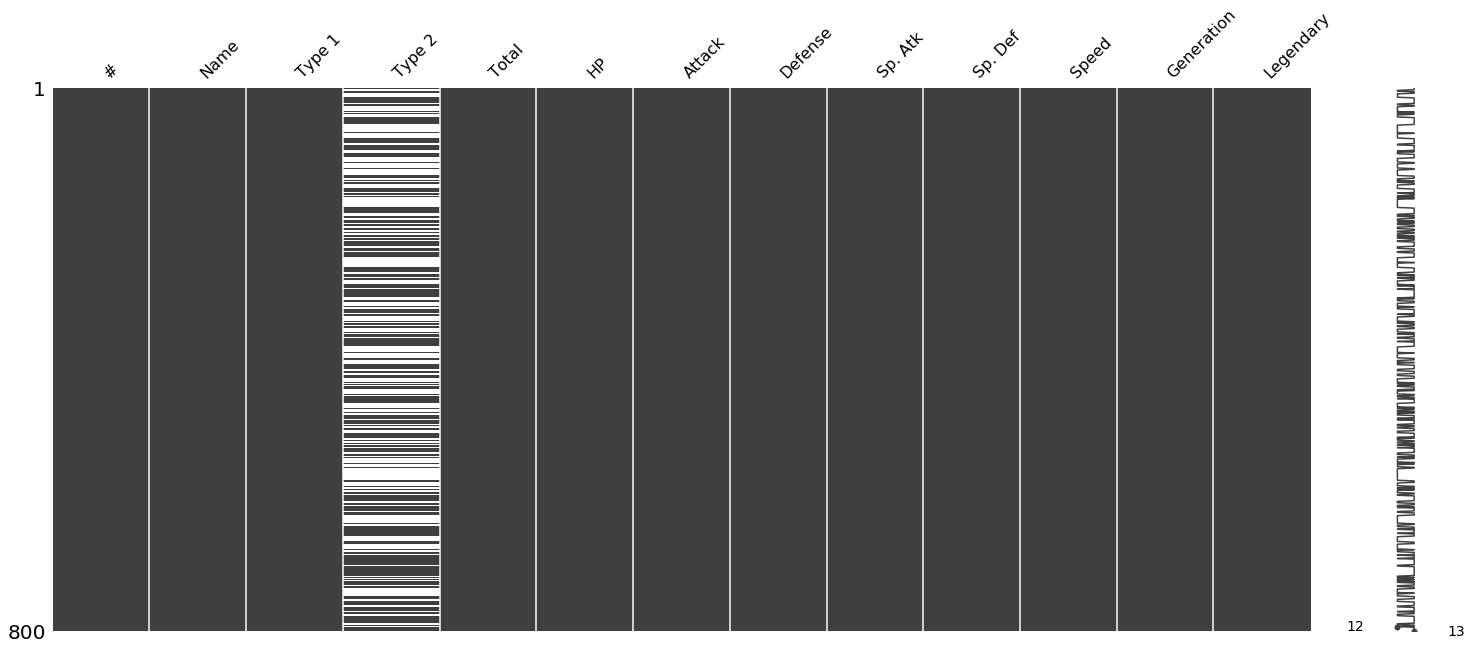

In [11]:
msno.matrix(df)

In [12]:
df.replace({' ': np.nan}, inplace=True)

In [13]:
df.isnull().any().any()

True

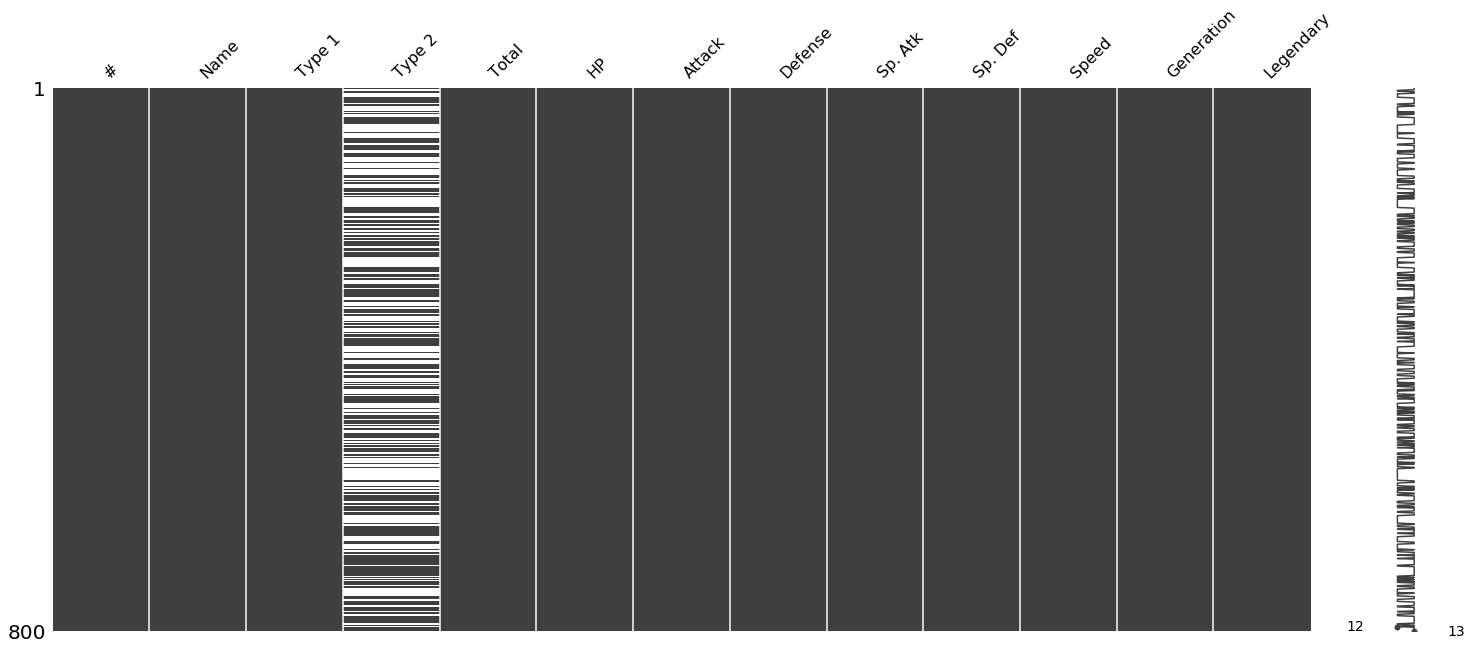

In [14]:
msno.matrix(df)

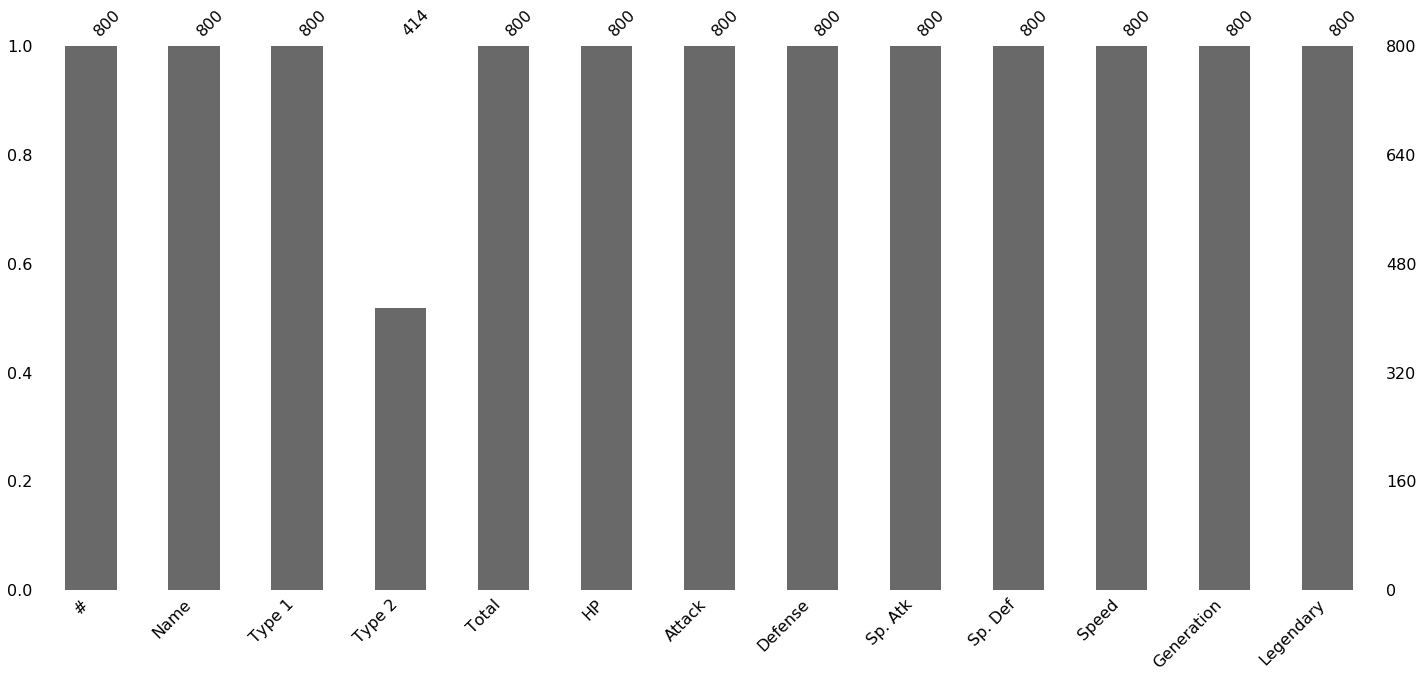

In [15]:
msno.bar(df)

In [16]:
df.columns[df.isnull().any()].tolist()

['Type 2']

In [17]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [18]:
df.loc[[0]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [19]:
df.loc[30:33]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
32,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False


In [20]:
df.drop([0,24,51], axis=0).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [21]:
df.drop(df.index[1:5], axis=0).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [22]:
df[100:].head() #df.tail(-100) )

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
100,93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,1,False
101,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
104,96,Drowzee,Psychic,NaN,328,60,48,45,43,90,42,1,False


In [23]:
df['Type 2'].values

array(['Poison', 'Poison', 'Poison', 'Poison', nan, nan, 'Flying',
       'Dragon', 'Flying', nan, nan, nan, nan, nan, nan, 'Flying',
       'Poison', 'Poison', 'Poison', 'Poison', 'Flying', 'Flying',
       'Flying', 'Flying', nan, nan, 'Flying', 'Flying', nan, nan, nan,
       nan, nan, nan, nan, nan, 'Ground', nan, nan, 'Ground', nan, nan,
       nan, nan, 'Fairy', 'Fairy', 'Flying', 'Flying', 'Poison', 'Poison',
       'Poison', 'Grass', 'Grass', 'Poison', 'Poison', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 'Fighting', nan, nan, nan,
       nan, nan, nan, nan, 'Poison', 'Poison', 'Poison', 'Poison',
       'Poison', 'Ground', 'Ground', 'Ground', nan, nan, 'Psychic',
       'Psychic', 'Psychic', 'Steel', 'Steel', 'Flying', 'Flying',
       'Flying', nan, 'Ice', nan, nan, nan, 'Ice', 'Poison', 'Poison',
       'Poison', 'Poison', 'Ground', nan, nan, nan, nan, nan, nan,
       'Psychic', 'Psychic', nan, nan, nan, nan, nan, nan, nan, 'Rock',
       'Rock', nan,

In [24]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [25]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [26]:
df.agg(['count', 'size', 'nunique'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800,800,800,414,800,800,800,800,800,800,800,800,800
size,800,800,800,800,800,800,800,800,800,800,800,800,800
nunique,721,800,18,18,200,94,111,103,105,92,108,6,2


In [27]:
df.groupby('Type 2').agg(['count', 'size', 'nunique']).stack()

#  Name  Type 1  Total  HP  Attack  Defense  Sp. Atk  \
Type 2                                                                    
Bug      count     3     3       3      3   3       3        3        3   
         size      3     3       3      3   3       3        3        3   
         nunique   3     3       2      3   3       3        3        3   
Dark     count    20    20      20     20  20      20       20       20   
         size     20    20      20     20  20      20       20       20   
         nunique  18    20       8     20  11      18       15       15   
Dragon   count    18    18      18     18  18      18       18       18   
         size     18    18      18     18  18      18       18       18   
         nunique  17    18      11     15  16      13       13       14   
Electric count     6     6       6      6   6       6        6        6   
         size      6     6       6      6   6       6        6        6   
         nunique   6     6       4      6   6       6        6        6   
Fairy    count    23    23      23     23  23      23       23       23   
         size     23    23      23     23  23      23       23       23   
         nunique  20    23       8     22  16      18       17       18   
Fighting count    26    26      26     26  26      26       26       26   
         size     26    26      26     26  26      26       26       26   
         nunique  22    26      10     18  15      22       17       21   
Fire     count    12    12      12     12  12      12       12       12   
         size     12    12      12     12  12      12       12       12   
         nunique  11    12       7     10   7      10        9       11   
Flying   count    97    97      97     97  97      97       97       97   
         size     97    97      97     97  97      97       97       97   
         nunique  90    97      17     65  34      48       34       45   
Ghost    count    14    14      14     14  14      14       14       14   
         size     14    14      14     14  14      14       14       14   
         nunique  12    14       8     11  10      11       10       10   
Grass    count    25    25      25     25  25      25       25       25   
         size     25    25      25     25  25      25       25       25   
         nunique  19    25       7     18  18      17       14       14   
Ground   count    35    35      35     35  35      35       35       35   
         size     35    35      35     35  35      35       35       35   
         nunique  31    35      10     30  20      26       25       21   
Ice      count    14    14      14     14  14      14       14       14   
         size     14    14      14     14  14      14       14       14   
         nunique  11    14       6     13   9      12       11       13   
Normal   count     4     4       4      4   4       4        4        4   
         size      4     4       4      4   4       4        4        4   
         nunique   4     4       2      4   3       4        4        3   
Poison   count    34    34      34     34  34      34       34       34   
         size     34    34      34     34  34      34       34       34   
         nunique  31    34       4     29  11      21       19       22   
Psychic  count    33    33      33     33  33      33       33       33   
         size     33    33      33     33  33      33       33       33   
         nunique  28    33      11     20  16      21       21       23   
Rock     count    14    14      14     14  14      14       14       14   
         size     14    14      14     14  14      14       14       14   
         nunique  14    14       5     13  11      13       11       12   
Steel    count    22    22      22     22  22      22       22       22   
         size     22    22      22     22  22      22       22       22   
         nunique  20    22       9     17  15      20       15       18   
Water    count    14    14      14     14  1

In [28]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False
175,161,Sentret,Normal,NaN,215,35,46,34,35,45,20,2,False
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
242,224,Octillery,Water,NaN,480,75,105,75,105,75,45,2,False


In [29]:
df.shape

(800, 13)

In [30]:
df_sample.shape

(40, 13)

In [31]:
df_dropped = df.dropna(subset=['HP'])
df_dropped.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [32]:
df_dropped.shape

(800, 13)

In [33]:
df_copy = df.copy()
df_copy.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [34]:
df_copy.shape

(800, 13)

In [35]:
df_dropped['Attack'].dtype

dtype('int64')

In [36]:
df_dropped['Attack'].mean() 

79.00125

In [37]:
df_copy['Attack'].fillna(value=np.round(df['Attack'].mean(),decimals=0), inplace=True)

In [38]:
df_copy.agg(['count', 'size', 'nunique'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800,800,800,414,800,800,800,800,800,800,800,800,800
size,800,800,800,800,800,800,800,800,800,800,800,800,800
nunique,721,800,18,18,200,94,111,103,105,92,108,6,2


In [39]:
list(df['Type 2'].unique())

['Poison',
 nan,
 'Flying',
 'Dragon',
 'Ground',
 'Fairy',
 'Grass',
 'Fighting',
 'Psychic',
 'Steel',
 'Ice',
 'Rock',
 'Dark',
 'Water',
 'Electric',
 'Fire',
 'Ghost',
 'Bug',
 'Normal']

In [41]:
keys = list(df['Type 2'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Poison': 1,
 nan: 2,
 'Flying': 3,
 'Dragon': 4,
 'Ground': 5,
 'Fairy': 6,
 'Grass': 7}

In [42]:
df_copy['Type 2'] = df['Type 2'].map(act)
df_copy.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,1.0,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,1.0,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,1.0,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,1.0,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,2.0,309,39,52,43,60,50,65,1,False


In [44]:
list(df_copy['Type 2'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan]

In [45]:
df_copy['Attack'].mean()

79.00125

In [46]:
df_copy['Attack'][df_copy['Type 2'] == 6]

44      45
45      70
131     45
188     30
198     20
199     50
303     25
304     35
305     65
306     85
322     20
328     85
329    105
366    110
487     25
591     60
606     27
607     67
772     58
773     50
777     80
795    100
796    160
Name: Attack, dtype: int64

In [47]:
df_copy['Attack'][df_copy['Type 2'] == 6].mean()

61.608695652173914

In [48]:
df_copy.groupby(["Type 1", "Type 2", "Attack", "Defense"]).count()

#  Name  Total  HP  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2 Attack Defense                                                
Bug    1.0    25     50       1     1      1   1        1        1      1   
              35     30       1     1      1   1        1        1      1   
              45     59       1     1      1   1        1        1      1   
              50     70       1     1      1   1        1        1      1   
              55     50       1     1      1   1        1        1      1   
...                          ..   ...    ...  ..      ...      ...    ...   
Water  6.0    20     50       1     1      1   1        1        1      1   
              50     80       1     1      1   1        1        1      1   
       7.0    30     30       1     1      1   1        1        1      1   
              50     50       1     1      1   1        1        1      1   
              70     70       1     1      1   1        1        1      1   

                              Generation  Legendary  
Type 1 Type 2 Attack Defense                         
Bug    1.0    25     50                1          1  
              35     30                1          1  
              45     59                1          1  
              50     70                1          1  
              55     50                1          1  
...                                  ...        ...  
Water  6.0    20     50                1          1  
              50     80                1          1  
       7.0    30     30                1          1  
              50     50                1          1  
              70     70                1          1  

[597 rows x 9 columns]

In [50]:
df_copy.Attack

0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64

In [51]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False
175,161,Sentret,Normal,NaN,215,35,46,34,35,45,20,2,False
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
242,224,Octillery,Water,NaN,480,75,105,75,105,75,45,2,False


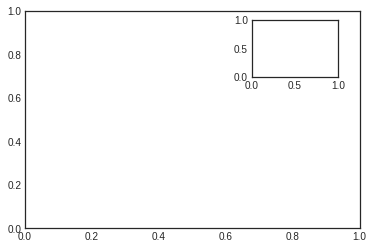

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

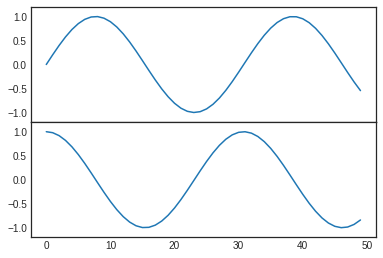

In [54]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

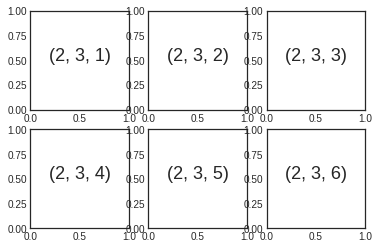

In [55]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

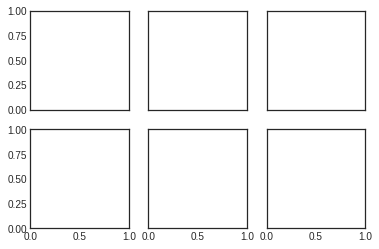

In [56]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

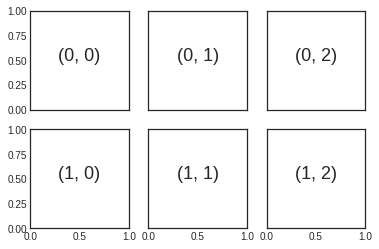

In [57]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

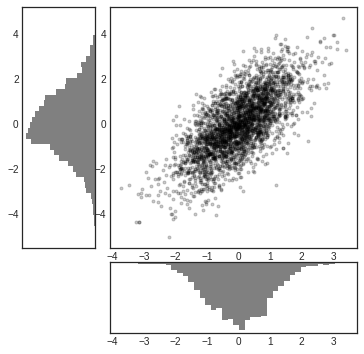

In [58]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

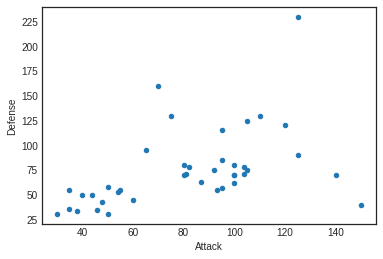

In [61]:
#figure.savefig('.../.jpeg')
#df_sample['ventas'] = dropna()
df_sample['Attack'] = df_sample['Attack'].astype('int64')

df_sample.plot(kind='scatter',x='Attack',y='Defense')

Text(0.5, 1.0, 'Attack Defense')

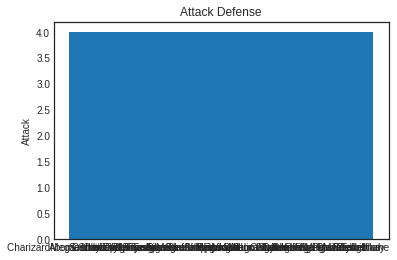

In [65]:
plt.hist(df_sample['Name'])
plt.ylabel('Attack')
plt.title('Attack Defense')

Text(0.5, 1.0, 'Box Plot of ventas count')

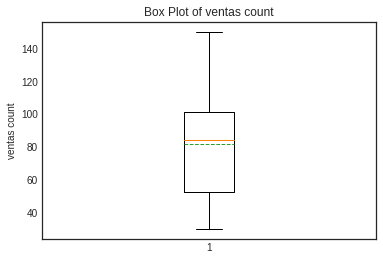

In [66]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_sample['Attack'], showmeans=True, meanline=True)
plt.ylabel('ventas count')
plt.title('Box Plot of ventas count')